In [23]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [24]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [25]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [26]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [27]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

busselton au
mataura pf
kudat my
barrow us
abapo bo
seoul kr
tonj sd
sinnamary gf
albany au
busselton au
kankavli in
provideniya ru
qaanaaq gl
pitimbu br
vardo no
khao wong th
padang id
prince rupert ca
samusu ws
cape town za
mankono ci
megion ru
riyadh sa
new norfolk au
york us
cabo san lucas mx
coquimbo cl
rikitea pf
maneadero mx
thompson ca
xuddur so
mnogovershinnyy ru
yellowknife ca
hun ly
rikitea pf
neryungri ru
hithadhoo mv
salalah om
hermanus za
barentsburg sj
busselton au
tomatlan mx
nikolskoye ru
kudahuvadhoo mv
hermanus za
nouadhibou mr
upernavik gl
belushya guba ru
yellowknife ca
laguna br
kapaa us
kahului us
airai pw
harper lr
tezu in
kapaa us
gat ly
saint-philippe re
beringovskiy ru
rikitea pf
atuona pf
poum nc
new norfolk au
castro cl
mataura pf
codrington ag
atuona pf
yellowknife ca
arraial do cabo br
bluff nz
broken hill au
rikitea pf
mataura pf
bluff nz
omboue ga
souillac mu
ushuaia ar
saskylakh ru
bredasdorp za
thompson ca
snasa no
albany au
pag hr
pilao arcado br
was

kytmanovo ru
ossora ru
ravar ir
lata sb
port-gentil ga
faanui pf
babolna hu
mys shmidta ru
upernavik gl
laguna br
busselton au
upernavik gl
saskylakh ru
umred in
bandarbeyla so
anadyr ru
flinders au
hasaki jp
ushuaia ar
lodja cd
punta arenas cl
sawtell au
bluff nz
hobart au
eydhafushi mv
jamestown sh
tiksi ru
vaini to
tasiilaq gl
atuona pf
lebu cl
avarua ck
kapaa us
port alfred za
laizhou cn
rikitea pf
butaritari ki
busselton au
khatanga ru
tasiilaq gl
warqla dz
carnarvon au
ruswil ch
xining cn
bredasdorp za
victor harbor au
mataura pf
mar del plata ar
berdigestyakh ru
hobart au
kargasok ru
bluff nz
ushuaia ar
georgetown sh
rikitea pf
sambava mg
hermanus za
pagudpud ph
ribeira grande pt
provideniya ru
mys shmidta ru
new norfolk au
hilo us
khatanga ru
castro cl
rikitea pf
turinsk ru
esperance au
ushuaia ar
svetlaya ru
nelson bay au
matay eg
pangnirtung ca
ushuaia ar
bluff nz
east london za
samusu ws
narsaq gl
hilo us
mahadday weyne so
daru pg
sangamner in
saldanha za
ust-tsilma ru
illel

In [28]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [29]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8efb80f723fdd3a9d1d159808deb0f38


In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [31]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [33]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [34]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | mataura
Processing Record 3 of Set 13 | kudat
Processing Record 4 of Set 13 | barrow
Processing Record 5 of Set 13 | abapo
Processing Record 6 of Set 13 | seoul
Processing Record 7 of Set 13 | tonj
Processing Record 8 of Set 13 | sinnamary
Processing Record 9 of Set 13 | albany
Processing Record 10 of Set 13 | kankavli
City not found. Skipping...
Processing Record 11 of Set 13 | provideniya
Processing Record 12 of Set 13 | qaanaaq
Processing Record 13 of Set 13 | pitimbu
Processing Record 14 of Set 13 | vardo
Processing Record 15 of Set 13 | khao wong
Processing Record 16 of Set 13 | padang
Processing Record 17 of Set 13 | prince rupert
Processing Record 18 of Set 13 | samusu
City not found. Skipping...
Processing Record 19 of Set 13 | cape town
Processing Record 20 of Set 13 | mankono
Processing Record 21 of Set 13 | megion
Processing Record 22 of Set 13 | riyadh
Processing Record 23 of Set 13 | new norfolk
Proc

City not found. Skipping...
Processing Record 38 of Set 16 | grand gaube
Processing Record 39 of Set 16 | sao filipe
Processing Record 40 of Set 16 | kasongo-lunda
Processing Record 41 of Set 16 | mozarlandia
Processing Record 42 of Set 16 | los llanos de aridane
Processing Record 43 of Set 16 | mbandaka
Processing Record 44 of Set 16 | pangnirtung
Processing Record 45 of Set 16 | kabalo
Processing Record 46 of Set 16 | mareeba
Processing Record 47 of Set 16 | tweed
Processing Record 48 of Set 16 | angoche
Processing Record 49 of Set 16 | darhan
Processing Record 50 of Set 16 | kainantu
Processing Record 1 of Set 17 | port hardy
Processing Record 2 of Set 17 | husavik
Processing Record 3 of Set 17 | kasane
Processing Record 4 of Set 17 | kununurra
Processing Record 5 of Set 17 | lima
Processing Record 6 of Set 17 | longyearbyen
Processing Record 7 of Set 17 | jerez
Processing Record 8 of Set 17 | ketchikan
Processing Record 9 of Set 17 | zaysan
Processing Record 10 of Set 17 | sentyabr

Processing Record 22 of Set 20 | harindanga
Processing Record 23 of Set 20 | olinda
Processing Record 24 of Set 20 | tessalit
Processing Record 25 of Set 20 | iranshahr
Processing Record 26 of Set 20 | pimentel
Processing Record 27 of Set 20 | preston
Processing Record 28 of Set 20 | talcahuano
Processing Record 29 of Set 20 | ancud
Processing Record 30 of Set 20 | saint-die
City not found. Skipping...
Processing Record 31 of Set 20 | khonuu
City not found. Skipping...
Processing Record 32 of Set 20 | shizunai
Processing Record 33 of Set 20 | veraval
Processing Record 34 of Set 20 | turukhansk
Processing Record 35 of Set 20 | singaraja
Processing Record 36 of Set 20 | burica
City not found. Skipping...
Processing Record 37 of Set 20 | suamico
Processing Record 38 of Set 20 | berlevag
Processing Record 39 of Set 20 | karatsu
Processing Record 40 of Set 20 | boquira
Processing Record 41 of Set 20 | sayyan
Processing Record 42 of Set 20 | kysyl-syr
Processing Record 43 of Set 20 | couliha

Processing Record 9 of Set 24 | umm lajj
Processing Record 10 of Set 24 | agde
Processing Record 11 of Set 24 | tortoli
Processing Record 12 of Set 24 | sedelnikovo
City not found. Skipping...
Processing Record 13 of Set 24 | santa rosa
Processing Record 14 of Set 24 | kondinskoye
Processing Record 15 of Set 24 | haines junction
Processing Record 16 of Set 24 | bathsheba
Processing Record 17 of Set 24 | crab hill
City not found. Skipping...
Processing Record 18 of Set 24 | port stanley
Processing Record 19 of Set 24 | vung tau
Processing Record 20 of Set 24 | kapit
Processing Record 21 of Set 24 | nguiu
City not found. Skipping...
Processing Record 22 of Set 24 | saquarema
Processing Record 23 of Set 24 | grand-lahou
Processing Record 24 of Set 24 | taksimo
Processing Record 25 of Set 24 | manuk mangkaw
Processing Record 26 of Set 24 | wagar
Processing Record 27 of Set 24 | turayf
Processing Record 28 of Set 24 | pemberton
Processing Record 29 of Set 24 | oktyabrskoye
Processing Record

In [35]:
city_data

[{'City': 'Busselton',
  'Lat': -33.65,
  'Lng': 115.33,
  'Max Temp': 55.99,
  'Humidity': 83,
  'Cloudiness': 93,
  'Wind Speed': 10.87,
  'Country': 'AU',
  'Date': '2020-10-01 18:57:20'},
 {'City': 'Mataura',
  'Lat': -46.19,
  'Lng': 168.86,
  'Max Temp': 46.99,
  'Humidity': 73,
  'Cloudiness': 1,
  'Wind Speed': 7,
  'Country': 'NZ',
  'Date': '2020-10-01 18:57:20'},
 {'City': 'Kudat',
  'Lat': 6.88,
  'Lng': 116.85,
  'Max Temp': 78.8,
  'Humidity': 94,
  'Cloudiness': 20,
  'Wind Speed': 2.24,
  'Country': 'MY',
  'Date': '2020-10-01 18:57:20'},
 {'City': 'Barrow',
  'Lat': 71.29,
  'Lng': -156.79,
  'Max Temp': 33.8,
  'Humidity': 86,
  'Cloudiness': 90,
  'Wind Speed': 18.34,
  'Country': 'US',
  'Date': '2020-10-01 18:57:19'},
 {'City': 'Abapo',
  'Lat': -18.83,
  'Lng': -63.47,
  'Max Temp': 100.26,
  'Humidity': 19,
  'Cloudiness': 0,
  'Wind Speed': 16.82,
  'Country': 'BO',
  'Date': '2020-10-01 18:57:21'},
 {'City': 'Seoul',
  'Lat': 37.57,
  'Lng': 126.98,
  'Max Temp

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.99,83,93,10.87,AU,2020-10-01 18:57:20
1,Mataura,-46.19,168.86,46.99,73,1,7.00,NZ,2020-10-01 18:57:20
2,Kudat,6.88,116.85,78.80,94,20,2.24,MY,2020-10-01 18:57:20
3,Barrow,71.29,-156.79,33.80,86,90,18.34,US,2020-10-01 18:57:19
4,Abapo,-18.83,-63.47,100.26,19,0,16.82,BO,2020-10-01 18:57:21
5,Seoul,37.57,126.98,60.80,93,1,5.86,KR,2020-10-01 18:56:37
6,Tonj,7.27,28.68,74.52,83,0,1.92,SS,2020-10-01 18:57:21
7,Sinnamary,5.38,-52.95,85.53,64,44,8.37,GF,2020-10-01 18:57:21
8,Albany,42.60,-73.97,73.99,46,12,7.49,US,2020-10-01 18:57:22
9,Provideniya,64.38,-173.30,38.71,81,100,9.98,RU,2020-10-01 18:57:20


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [39]:
# Import the time module.
import time

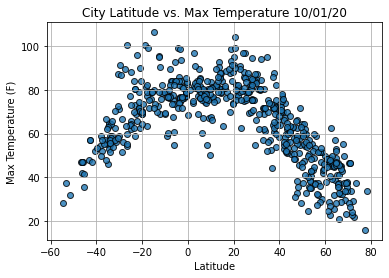

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

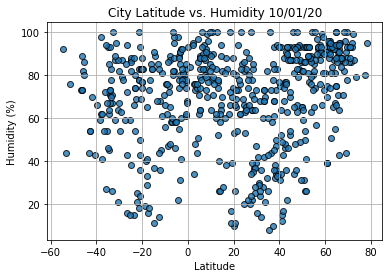

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

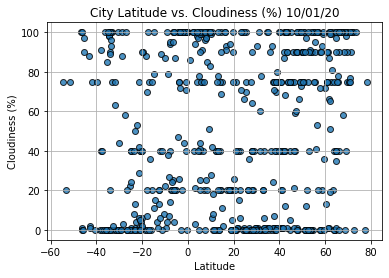

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

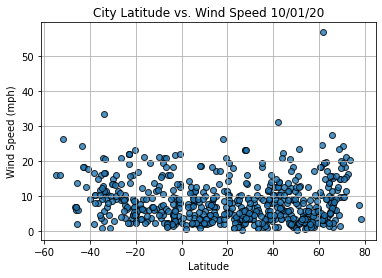

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [59]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
index13 = city_data_df.loc[13]
index13

City                    Khao Wong
Lat                          16.7
Lng                        104.09
Max Temp                    76.23
Humidity                       88
Cloudiness                     93
Wind Speed                   2.19
Country                        TH
Date          2020-10-01 18:57:23
Name: 13, dtype: object

In [63]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
587     True
588    False
589    False
590     True
591     True
Name: Lat, Length: 592, dtype: bool

In [65]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Kudat,6.88,116.85,78.80,94,20,2.24,MY,2020-10-01 18:57:20
3,Barrow,71.29,-156.79,33.80,86,90,18.34,US,2020-10-01 18:57:19
5,Seoul,37.57,126.98,60.80,93,1,5.86,KR,2020-10-01 18:56:37
6,Tonj,7.27,28.68,74.52,83,0,1.92,SS,2020-10-01 18:57:21
7,Sinnamary,5.38,-52.95,85.53,64,44,8.37,GF,2020-10-01 18:57:21


In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

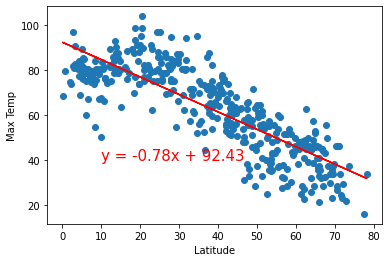

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere /n for Maximum Temperature", "Max Temp",(10,40))

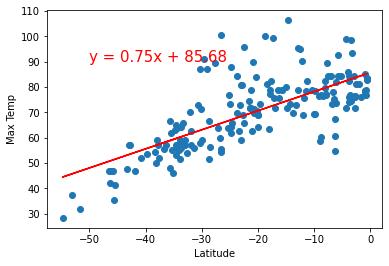

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

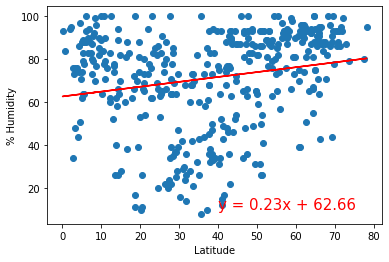

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

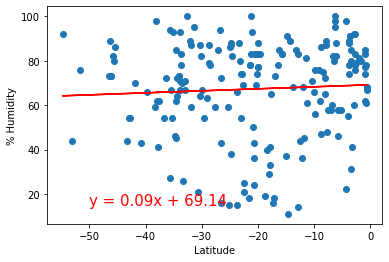

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

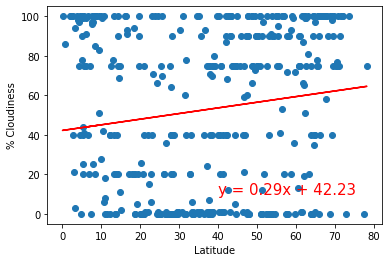

In [93]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.% 
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", '% Cloudiness',(40,10))

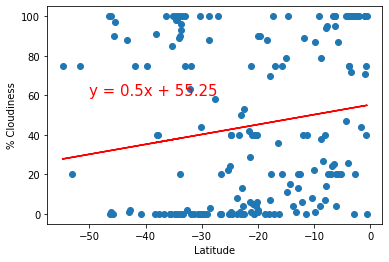

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

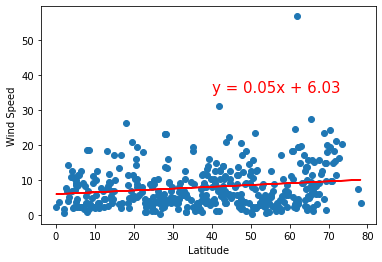

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

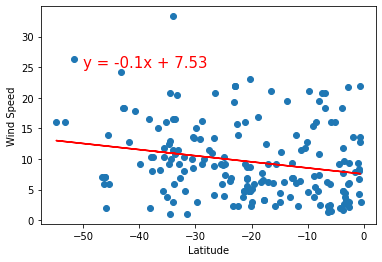

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))